In [340]:
import matplotlib.pyplot as plt
import numpy as np

In [341]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=60,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=42,
                           class_sep=2)

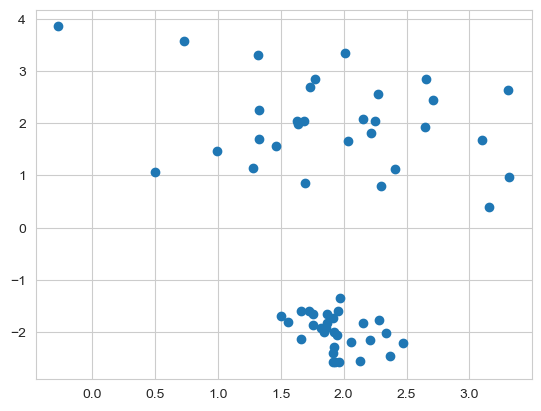

In [342]:
plt.scatter(X[:, 0], X[:, 1])

In [343]:
def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [344]:
from scipy.cluster.hierarchy import fcluster, linkage

clusters = linkage(X, method='ward')
T = fcluster(clusters, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 1.94131794, -1.99780786],
       [ 1.91069762,  2.02542078]])

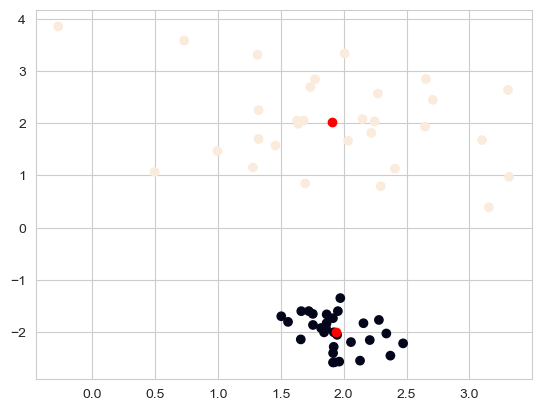

In [345]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red')

In [346]:
import math


class KohonenNetwork:
    def __init__(self, attribute_size, c):
        self.c = c
        self.a = [0.7 for _ in range(attribute_size)]

    def calculate_a(self, i):
        return (50 - i) / 100

    def winner(self, weights, sample):
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def print_statistics(self, i, weights):
        print(f'\nШаг для {i} кластера = {self.a[i]}')
        print(f'Веса после обновления:')
        print(weights)

    def update(self, weights, sample, j, step):
        for i in range(len(weights)):
            self.a[j] = self.calculate_a(step)
            weights[j][i] = weights[j][i] + self.a[j] * (sample[i] - weights[j][i])

        self.print_statistics(j, weights)

        return weights

In [347]:
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

# Обучающие веса (n, C)
# n - количество атрибутов в записи
# C - количество кластеров
C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[1.10261378, 1.07540902],
       [0.81542698, 1.00762995]])

In [348]:
network = KohonenNetwork(n, C)

for i in range(m):
    sample = T[i]
    winner = network.winner(weights, sample)
    weights = network.update(weights, sample, winner, i)


Шаг для 1 кластера = 0.5
Веса после обновления:
[[ 1.10261378  1.07540902]
 [ 1.39010399 -0.7770354 ]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[ 1.70866206 -0.44326412]
 [ 1.39010399 -0.7770354 ]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[ 1.70866206 -0.44326412]
 [ 1.82442936 -0.02292649]]

Шаг для 0 кластера = 0.47
Веса после обновления:
[[ 2.46019455  1.00456966]
 [ 1.82442936 -0.02292649]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[2.46019455 1.00456966]
 [1.75888552 0.93040714]]

Шаг для 1 кластера = 0.45
Веса после обновления:
[[2.46019455 1.00456966]
 [1.96611227 1.32876297]]

Шаг для 0 кластера = 0.44
Веса после обновления:
[[2.26125689 2.03010054]
 [1.96611227 1.32876297]]

Шаг для 0 кластера = 0.43
Веса после обновления:
[[1.91576877 1.83365553]
 [1.96611227 1.32876297]]

Шаг для 1 кластера = 0.42
Веса после обновления:
[[1.91576877 1.83365553]
 [2.08359823 1.62573869]]

Шаг для 1 кластера = 0.41
Веса после обновления:
[[1.91576877 1.83365553]
 

In [349]:
print("Обученные веса: ")
print(weights)

Обученные веса: 
[[ 1.70805786  0.7005361 ]
 [ 2.02534925 -0.39881894]]


In [350]:
predicted = np.array([network.winner(weights, s) for s in X])
predicted

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [351]:
print('Совпадают ли результаты нейронной сети с реальными данными:')
y == predicted

Совпадают ли результаты нейронной сети с реальными данными:


array([False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True])

In [352]:
from sklearn.metrics import accuracy_score

print(f'Точность нейронной сети: {accuracy_score(y, predicted) * 100}%')

Точность нейронной сети: 61.66666666666667%
